<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import pickle

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Ответ: Фиксация сидов нужна для воспроизводимости нашего рандома. То есть для numpy и random мы фиксируем РАНДОМНЫЕ генераторы, чтобы каждый вызов кода
с рандомом возвращал один и тот же результат при повторном запуске ячейки.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')
print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

> Отобразите 30 случайных строк тренировочного датасета.

In [3]:
df_train.sample(n=30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


 > Отобразите первые 5 и последние 5 объектов тестового датасета

In [4]:
pd.concat([df_test.head(5),df_test.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


> Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения

In [5]:
df_null = df_train.isna().sum()
df_null[df_null > 0]

mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

> Посмотрите, есть ли в данных явные дубликаты

In [6]:
df_train.duplicated().sum()

np.int64(985)

>  Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?

Глядя на случайные строки в данных можно сделать вывод об их качестве и разнообразии, глядя на верхние и нижние строки можно сделать вывод о структуре данных. НО во всех перечисленных случаях нельзя сделать вывод о корреляции признаков, количестве дубликатов и пропущенных значений, так как данных, которые мы увидели, мало для того, чтобы оценить количество пропускоа, дубликатов и так далее.

> Достаточно ли метода duplicated для анализа дубликатов? Почему?

Метод duplicated выведет все ПОЛНЫЕ найденные дубликаты, но, например, не сможет найти "неполные" дубликаты,
которые могут появиться засчет опечаток в данных ("Disel" вместо "Diesel", например).

> Постройте дашборд, используя ydata-profilling

In [7]:
# Строим для train (Логично, я думаю)
profile = ProfileReport(df_train, title="Car dataset analysis")
profile.to_file("dashboard.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 132.53it/s]


Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [8]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [9]:
df_test.isna().sum()
df_test["seats"].dtype

dtype('float64')

> ДИСКЛЕЙМЕР !!! - в столбцах, где есть пропуски (указаны в выводах выше) текстовые типы данных, которые мы НЕ МОЖЕМ заполнить
> медианой (mileage, engine, max_power (torque мы потом удалим, так что не очень важно).)
> Поэтому считаю корректным сначала привести данные в нужный вид (мы это делаем в задании 3), а ПОТОМ заполнить медианой

In [10]:
# Нужна для крайнего случая в колонке max_power (один раз встречается просто 'bhp')
def str_to_float(string):
    try:
        str_list = str(string).split()
        return np.float64(str_list[0])
    except:
        return np.nan

In [11]:
# Приведем тип данных на трейне в вышеперечисленных столбцах к типу float64
df_train["mileage"] = df_train["mileage"].str.split().str[0].astype(np.float64)
df_train["engine"] = df_train["engine"].str.split().str[0].astype(np.float64)
# Так как есть тот самый случай, описанный выше, то применяем функцию
df_train["max_power"] = df_train["max_power"].apply(str_to_float)

In [12]:
# То же самое для test
df_test["mileage"] = df_test["mileage"].str.split().str[0].astype(np.float64)
df_test["engine"] = df_test["engine"].str.split().str[0].astype(np.float64)
df_test["max_power"] = df_test["max_power"].apply(str_to_float)

In [13]:
cols = ["mileage","engine","max_power","seats"]
# Медиана для трейна, чтобы ей заполнить test
train_med = df_train[cols].median()
df_train[cols] = df_train[cols].fillna(train_med)
df_test[cols] = df_test[cols].fillna(train_med)

### **Задание 2 (0.5 балла)**

На прошлом шаге вы убедились, что явных дубликатов в таблице нет. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


>  Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)

In [14]:
df_train_no_target = df_train.drop(["selling_price"],axis=1)
print(df_train_no_target.duplicated().sum().sum())

1159


>  Отобразите такие объекты (0.15 балла)

In [15]:
df_train_no_target[df_train_no_target.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


>  Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)

In [16]:
to_remove_index = df_train_no_target[df_train_no_target.duplicated(keep="first")].index
df_train.drop(to_remove_index,inplace=True)

> Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)

In [17]:
df_train.reset_index(drop=True,inplace=True)

In [18]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

> Смотреть ДИСКЛЕЙМЕР !! (Сделали часть задания в последнем пункте задания 1)

In [19]:
# Уже привели в прошлом задании, СМОТРЕТЬ ДИСКЛЕЙМЕР, поэтому сейчас только отбрасываем torque
df_train.drop(["torque"],axis=1,inplace=True)
df_test.drop(["torque"],axis=1,inplace=True)


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [20]:
df_train["engine"] = df_train["engine"].astype(int)
df_train["seats"] = df_train["seats"].astype(int)
df_test["engine"] = df_test["engine"].astype(int)
df_test["seats"] = df_test["seats"].astype(int)
df_test["seats"].dtype

dtype('int64')

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

> Посчитайте основные статистики по числовым столбцам для трейна и теста

In [21]:
df_train.describe(include=[np.number])

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [22]:
df_test.describe(include=[np.number])

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


> Посчитайте основные статистики по категориальным столбцам для трейна и теста

In [23]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [24]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [26]:
assert df_train.shape == (5840, 13) # 12 колонок, убрали torque пока причесывали датасет

AssertionError: 

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

> Шаг 1

> Ответ: исходя из ПОПАРНЫХ распределений некоторых признаков с таргетом (year, km_driven, max_power) видна отчетливая связь.
> На основе распределений можно выдвинуть гипотезу, что чем меньше возраст авто, меньше пробег и выше мощность - тем выше цена.

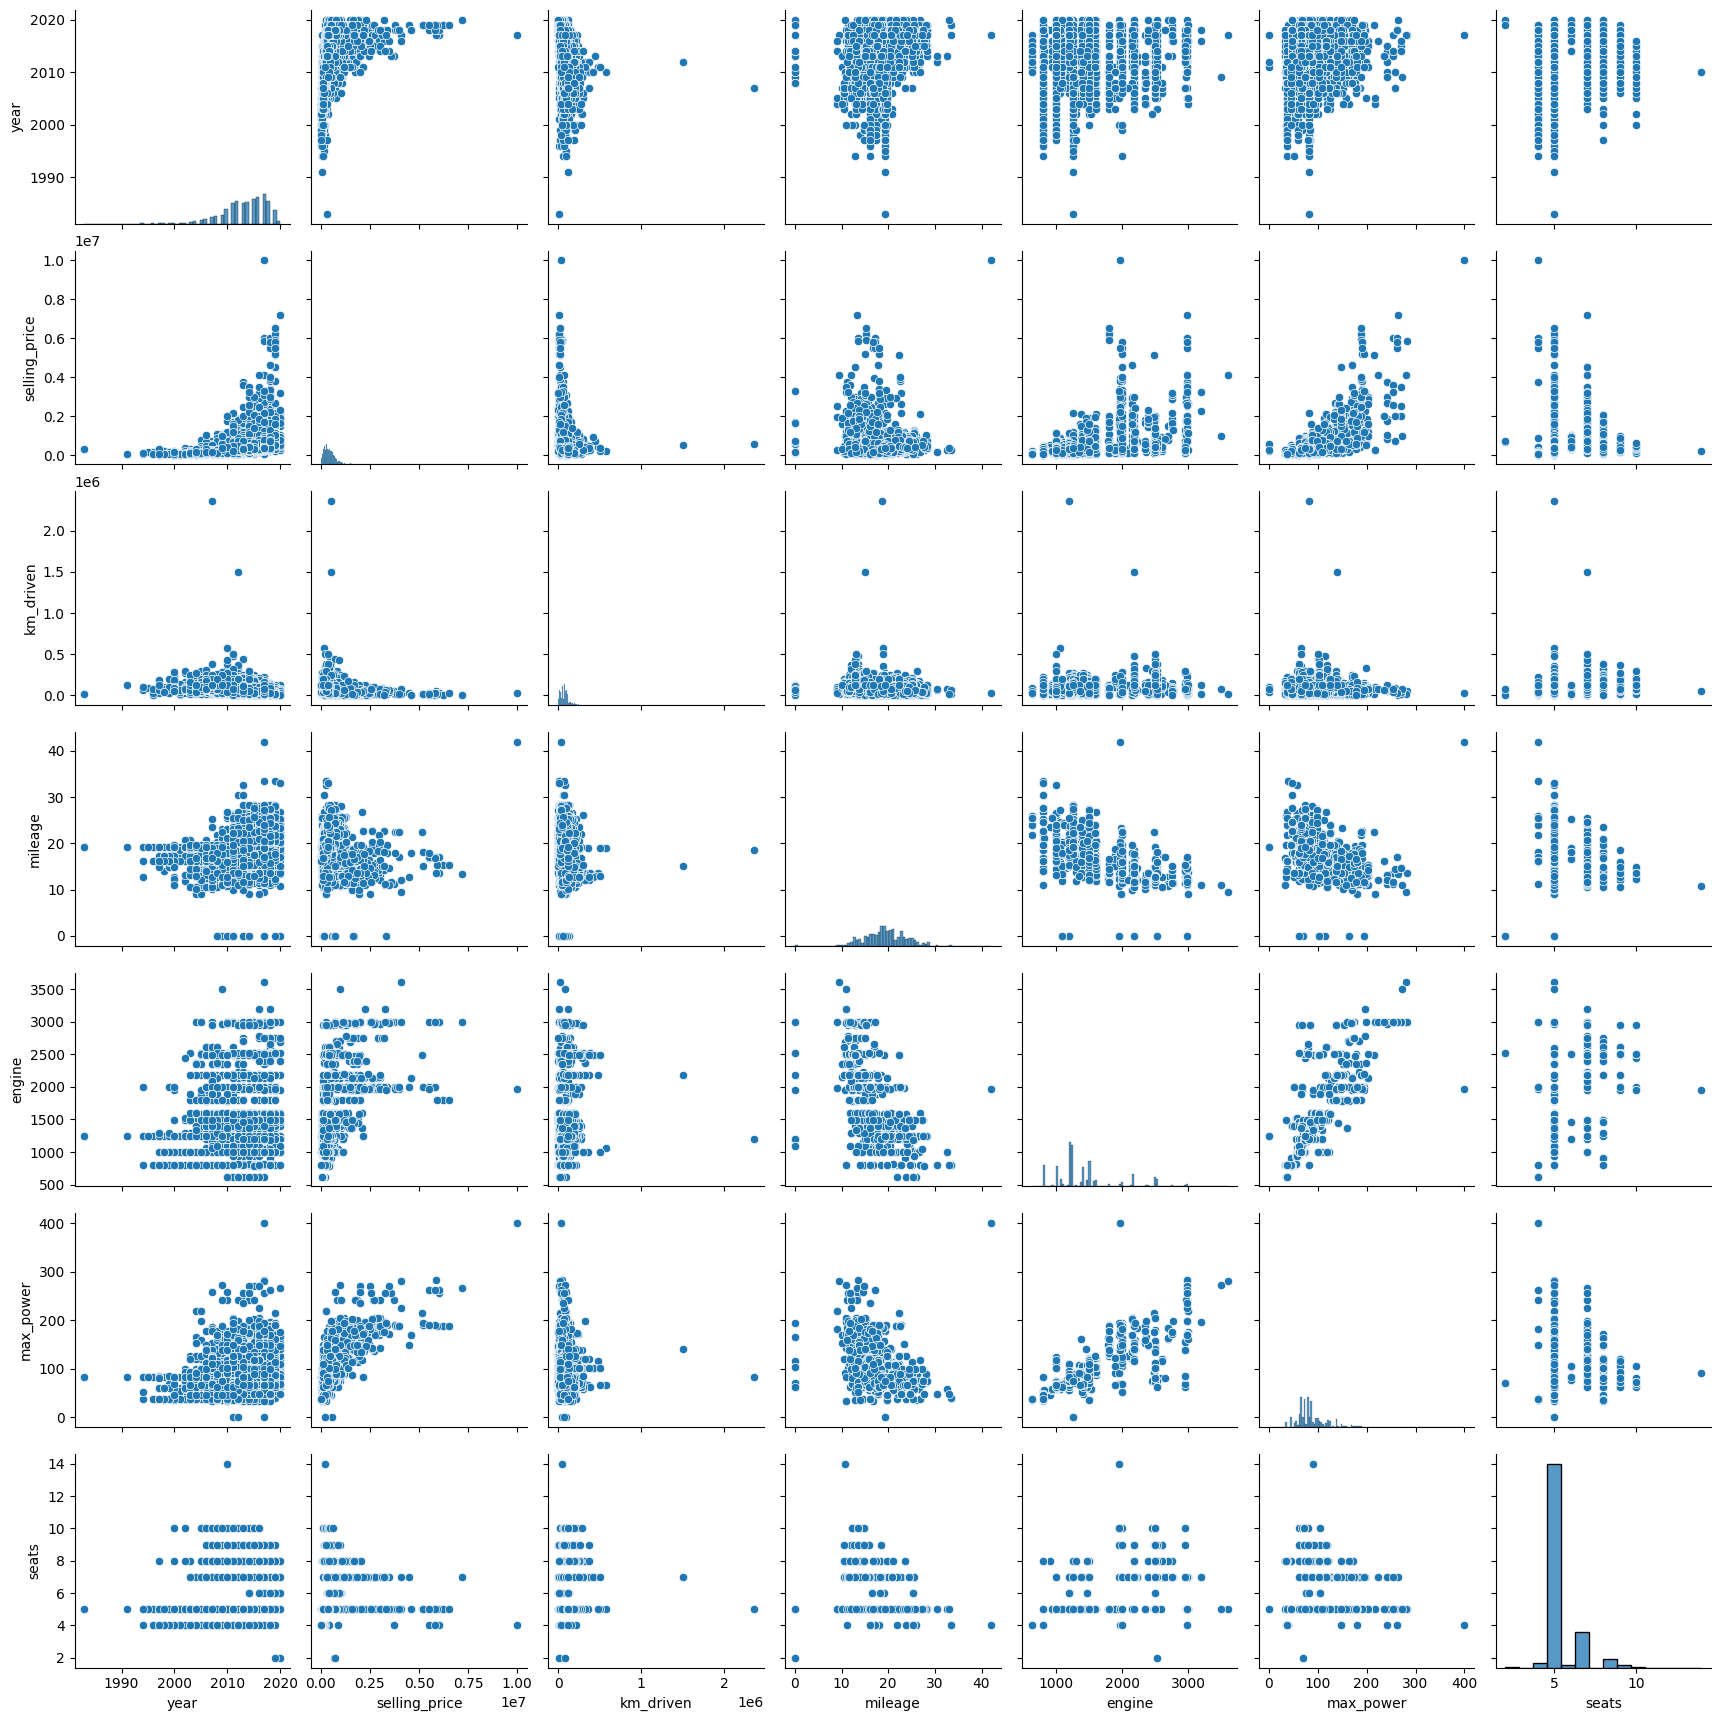

In [27]:
#признаюсь - тут священная АИшка (DeepSeek) помогла мне отобразить график (засчет этой строки)
%matplotlib inline 
numeric_cols_train = df_train.select_dtypes(include=[np.number])
sns.pairplot(numeric_cols_train)

> Шаг 2

> Ответ: совокупности на трейн и тест похожи качественно, но отличаются количественно.

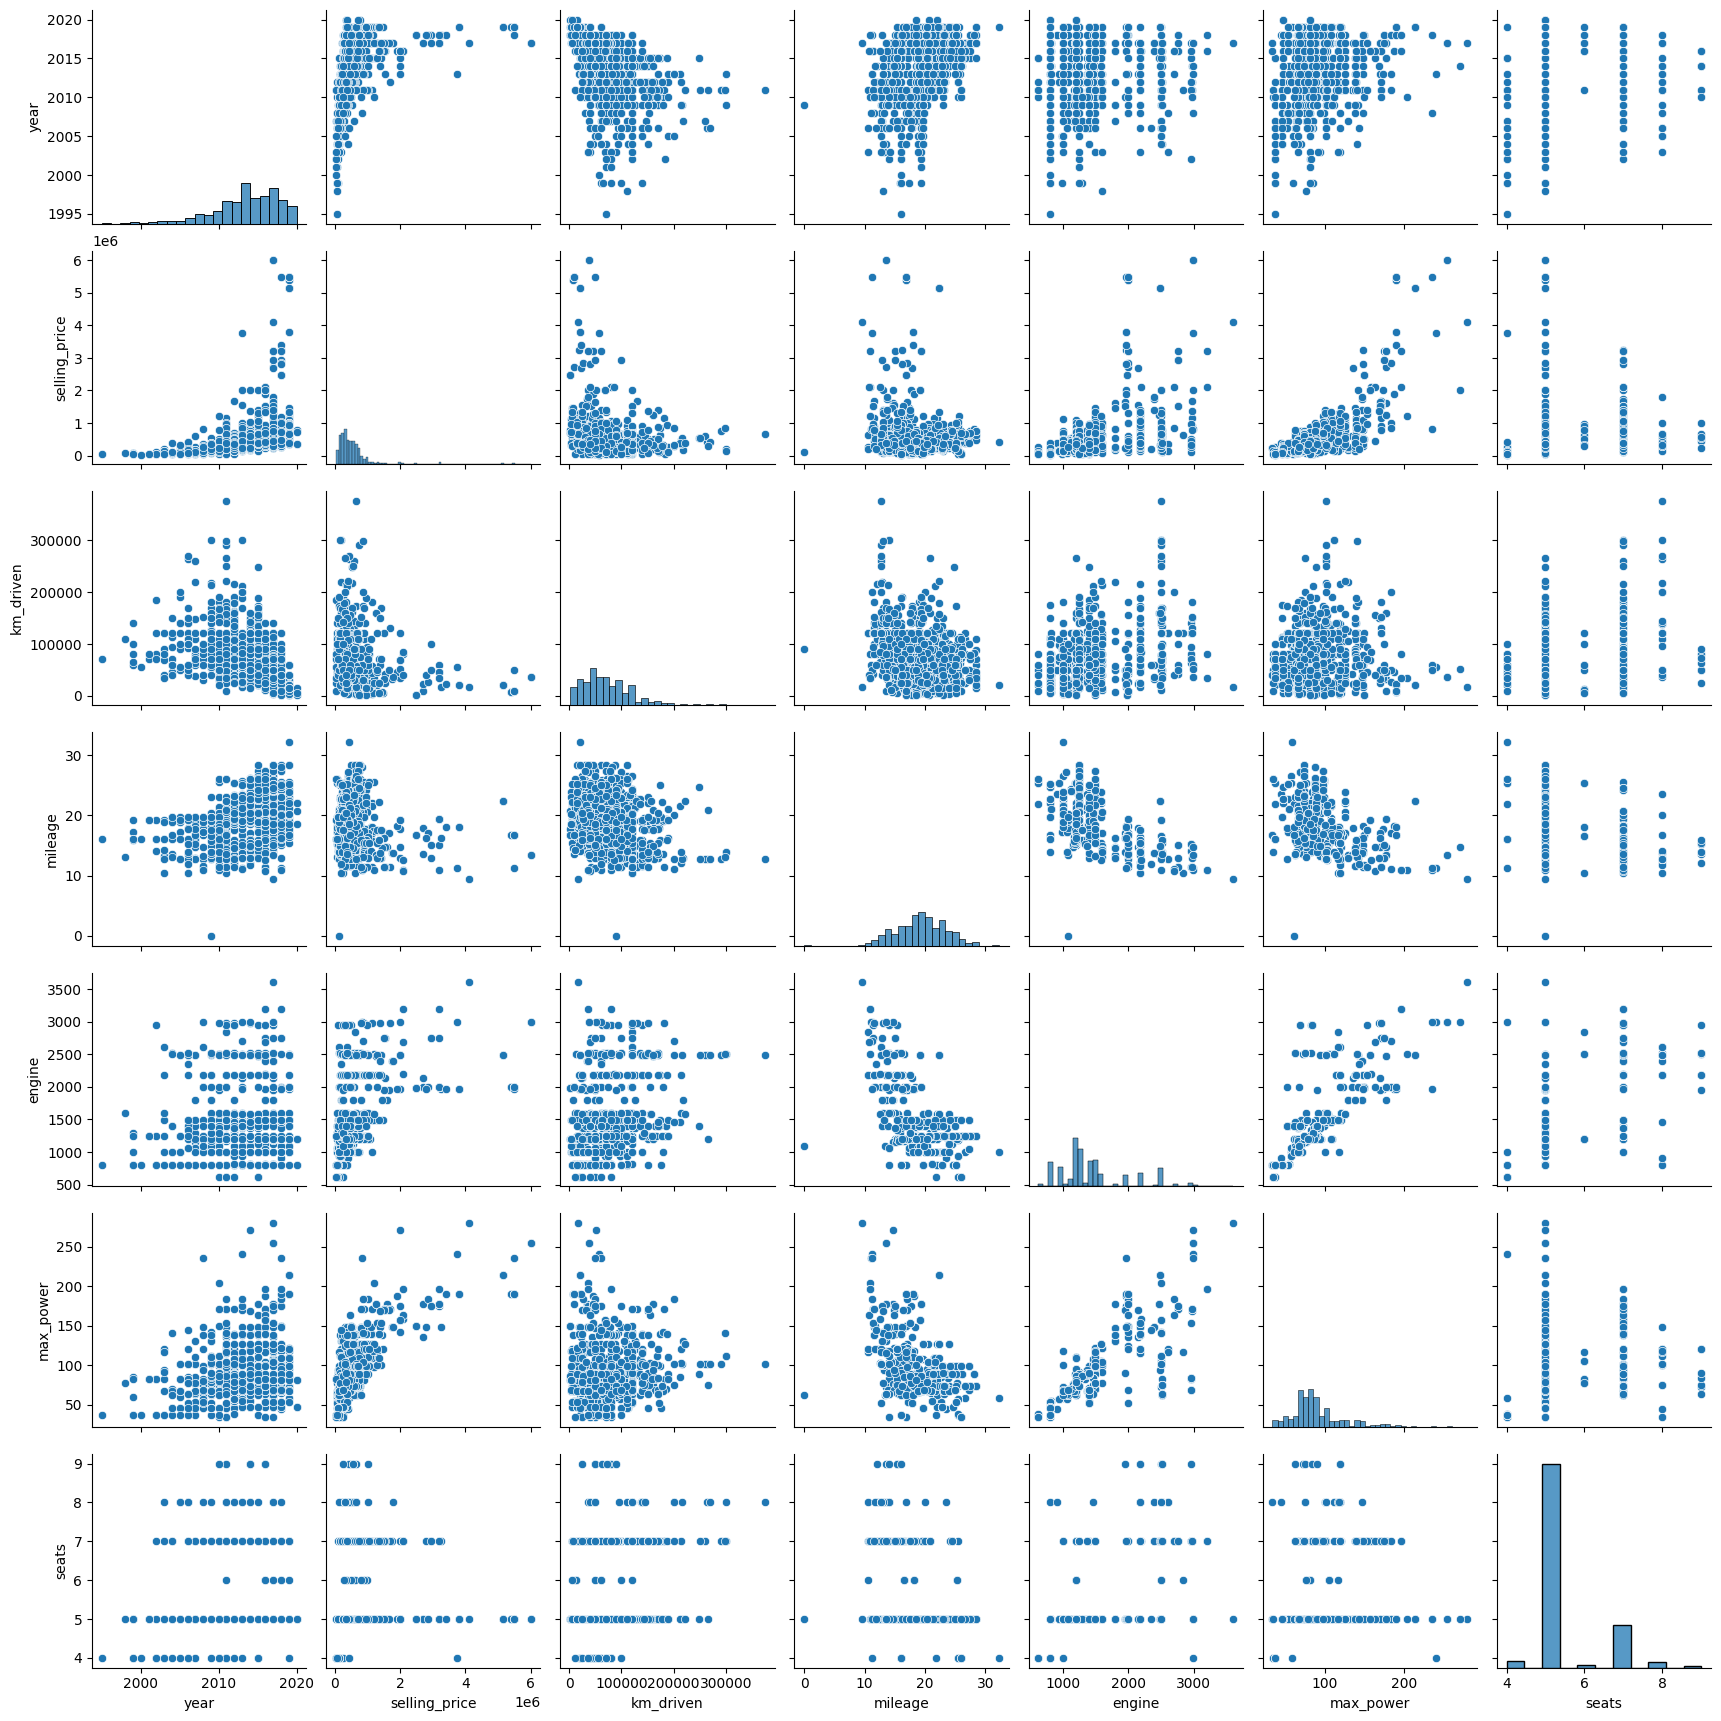

In [28]:
# то же самое насчет АИшки
%matplotlib inline 
numeric_cols_test = df_test.select_dtypes(include=[np.number]).columns
sns.pairplot(df_test[numeric_cols_test])

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

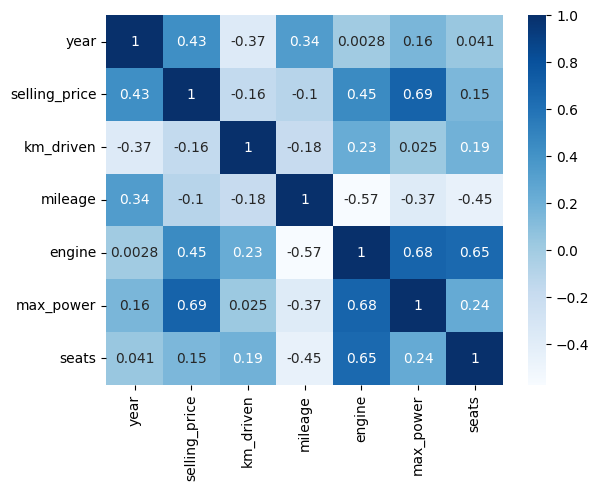

In [29]:
%matplotlib inline 
corr = df_train.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr,annot=True,cmap='Blues')

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

> 1) Наименее коррелируют Engine и Year
> 2) Между selling_price и max_power
> 3) Одно не является гарантией другого, ключевое слово тут СКОРЕЕ ВСЕГО, так что скорее да, чем нет

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [30]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_test_num = df_test.select_dtypes(include=[np.number])

In [31]:
y_train = df_train_num["selling_price"]
X_train = df_train_num.drop(["selling_price"],axis=1)

In [32]:
assert X_train.shape == (5840, 6)

In [33]:
y_test = df_test_num["selling_price"]
X_test = df_test_num.drop(["selling_price"],axis=1)

In [34]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [35]:
# Обучаем модель (наконец-то)
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
# Для трейна
pred_train = model_1.predict(X_train)
print(f"R2 train: {r2_score(y_train,pred_train)}")
print(f"MSE train: {MSE(y_train,pred_train)}")

R2 train: 0.5922629595849869
MSE train: 116873067751.52179


In [37]:
# Для теста
pred_test = model_1.predict(X_test)
print(f"R2 test: {r2_score(y_test,pred_test)}")
print(f"MSE test: {MSE(y_test,pred_test)}")

R2 test: 0.5941441219017086
MSE test: 233297548204.61337


> Выводы - И в первом, и во втором случае наша модель показывает идетничный R2. НО при этом MSE больше в 2 раза в предсказании на тестовых данных,
> в которых наблюдений меньше почти в 6 раз. Почему такое может быть? Возможно такое может быть из-за распределения величины таргета в тестовых данных.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

> В задании напрмую не сказано об обучении модели, но в следующем говорится о качестве, так что ВСЕ РАВНО обучим модель

In [39]:
model_std = LinearRegression()
model_std.fit(X_train_std,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
# Для трейна std
pred_train_std = model_std.predict(X_train_std)
print(f"R2 train std: {r2_score(y_train,pred_train_std)}")
print(f"MSE train std: {MSE(y_train,pred_train_std)}")

R2 train std: 0.5922629595849875
MSE train std: 116873067751.52162


In [41]:
# Для теста std
pred_test_std = model_std.predict(X_test_std)
print(f"R2 test std: {r2_score(y_test,pred_test_std)}")
print(f"MSE test std: {MSE(y_test,pred_test_std)}")

R2 test std: 0.5941441219017263
MSE test std: 233297548204.60324


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены? - max_power

In [42]:
X_train.columns[np.argmax(np.abs(model_std.coef_))]

'max_power'

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [43]:
# Наша Lasso модель
model_lasso = Lasso()

In [44]:
# Scaler для нормализации
norm_scaler = MinMaxScaler()
norm_scaler.fit(X_train)
# Отнормированные тренировочные и тестовые данные
X_train_norm = norm_scaler.transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

> Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество

In [45]:
model_lasso.fit(X_train_norm,y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [46]:
# Для трейна lasso
pred_train_norm = model_lasso.predict(X_train_norm)
print(f"R2 train lasso: {r2_score(y_train,pred_train_norm)}")
print(f"MSE train lasso: {MSE(y_train,pred_train_norm)}")

R2 train lasso: 0.5922629509597028
MSE train lasso: 116873070223.8589


In [47]:
# Для теста Lasso
pred_test_norm = model_lasso.predict(X_test_norm)
print(f"R2 test lasso: {r2_score(y_test,pred_test_norm)}")
print(f"MSE test lasso: {MSE(y_test,pred_test_norm)}")

R2 test lasso: 0.5941242429193464
MSE test lasso: 233308975211.3322


> На трейне качество приактически не изменилось, так же, как и качество на тесте. 

> Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [48]:
model_lasso.coef_

array([ 1381048.96954346, -1733076.0735531 ,   303044.61930255,
         375142.36866366,  4081054.59146237,  -283426.65178805])

> L1-регуляризация не занулила веса предположительно потому, что каждый признак вносит заметный вклад в предсказание.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [49]:
model_est = Lasso()

parameters = {
    'alpha' : [1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1, 1.0]
}

> Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии.

In [50]:
grid_search = GridSearchCV(model_est, parameters, cv=10, scoring='r2')

> Сколько грид-сёрчу пришлось обучать моделей?

In [51]:
grid_search.fit(X_train_norm,y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1e-06, 5e-06, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1.0


> GridSearch пришлось обучать 120 моделей (Количество фолдов умножить на количетсво значений параметра)

In [52]:
# Для трейна Lasso в нашем случае (лучшая модель, но прироста не замечено)
best_lasso = grid_search.best_estimator_
pred_train_bl = best_lasso.predict(X_train_norm)
print(f"R2 train bl: {r2_score(y_train,pred_train_bl)}")
print(f"MSE train bl: {MSE(y_train,pred_train_bl)}")

R2 train bl: 0.5922629509597028
MSE train bl: 116873070223.8589


In [53]:
# Для теста Lasso в нашем случае (лучшая модель, но прироста не замечено)
pred_test_bl = best_lasso.predict(X_test_norm)
print(f"R2 test lasso: {r2_score(y_test,pred_test_bl)}")
print(f"MSE test lasso: {MSE(y_test,pred_test_bl)}")

R2 test lasso: 0.5941242429193464
MSE test lasso: 233308975211.3322


> Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [54]:
grid_search.best_params_

{'alpha': 1.0}

> Как можно заметить, веса не занулились. Более того, лучший alpha не изменился и остался равен 1. Я посмотрел на score
> на разных фолдах и он не меняется от фолда к фолду с изменением alpha (наверное изменения минимальные из-за округления)

In [55]:
grid_search.best_estimator_.coef_

array([ 1381048.96954346, -1733076.0735531 ,   303044.61930255,
         375142.36866366,  4081054.59146237,  -283426.65178805])

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [56]:
model_e = ElasticNet(max_iter=10000)

parameters_e = {
    'l1_ratio' : [i for i in np.arange(0.1,0.9,0.1)],
    'alpha' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
}

In [57]:
grid_search_e = GridSearchCV(model_e, parameters_e, cv=10, scoring='r2')

> Сколько грид-сёрчу пришлось обучать моделей? - 700

In [58]:
grid_search_e.fit(X_train_norm,y_train)

,estimator,ElasticNet(max_iter=10000)
,param_grid,"{'alpha': [1e-05, 0.0001, ...], 'l1_ratio': [np.float64(0.1), np.float64(0.2), ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.001


In [59]:
best_elastic = grid_search_e.best_estimator_
# Для трейна ElasticNet в нашем случае
pred_train_el = best_elastic.predict(X_train_norm)
print(f"R2 train el: {r2_score(y_train,pred_train_el)}")
print(f"MSE train el: {MSE(y_train,pred_train_el)}")

R2 train el: 0.5854488253738838
MSE train el: 118826259859.14003


In [60]:
pred_test_el = best_elastic.predict(X_test_norm)
print(f"R2 test el: {r2_score(y_test,pred_test_el)}")
print(f"MSE train el: {MSE(y_test,pred_test_el)}")

R2 test el: 0.5662248384914819
MSE train el: 249346349561.77444


> Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [61]:
grid_search_e.best_params_

{'alpha': 0.001, 'l1_ratio': np.float64(0.30000000000000004)}

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [62]:
X_train_cat = df_train.drop(["name"],axis=1)
# Так как это тренировочный набор данных, то таргет нам не нужен здесь
X_train_cat.drop(["selling_price"],axis=1,inplace=True)
X_test_cat = df_test.drop(["name"],axis=1)
# То же самое для тестового набора данных
X_test_cat.drop(["selling_price"],axis=1,inplace=True)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [63]:
assert X_train_cat.shape == (5840, 10)

In [64]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [65]:
cat_columns = X_train_cat.select_dtypes(include=['object']).columns
cat_columns = cat_columns.append(pd.Index(['seats']))

X_train_cat_encoded = pd.get_dummies(X_train_cat, columns=cat_columns, drop_first=True, dtype=int)
X_test_cat_encoded = pd.get_dummies(X_test_cat, columns=cat_columns, drop_first=True, dtype=int)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [66]:
model_r = Ridge()

In [67]:
parameters_r = {
    'alpha' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
}

In [68]:
grid_search_r = GridSearchCV(model_r,parameters_r,cv=10,scoring='r2')

In [69]:
grid_search_r.fit(X_train_cat_encoded,y_train)
# Ругается потому, что матрица почти вырожденная (поправим ниже в рубрике "ЭЭЭЭЭКСПЕРИМЕНТЫ")

C:\Users\semio\air_quality_project\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=5.05758e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\semio\air_quality_project\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=5.05758e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\semio\air_quality_project\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=5.05758e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,estimator,Ridge()
,param_grid,"{'alpha': [1e-05, 0.0001, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10.0


In [70]:
best_ridge = grid_search_r.best_estimator_

In [71]:
pred_train_br = best_ridge.predict(X_train_cat_encoded)
print(f"R2 train br: {r2_score(y_train,pred_train_br)}")
print(f"MSE train br: {MSE(y_train,pred_train_br)}")
# Почему не сделали то же самое для Test? Когда мы кодируем seats на тесте, то у нас получаются разные колонки, 
# так как на тесте у нас НЕТ машины с 14 местами, как на трейне

R2 train br: 0.6537877907498775
MSE train br: 99237692378.66805


> Удалось немножко улучшить качество прогнозов

In [72]:
grid_search_r.best_score_

np.float64(0.6218786196491051)

> А что, если нормализовать вещественные признаки для Ridge? (ЭЭЭЭЭКСПЕРИМЕНТЫ !!!)

In [73]:
num_cols = X_train.columns
num_cols = num_cols.drop(['seats']) # Убираем как категиральный и уже закодированный признак

In [74]:
X_train_ns = X_train.drop(['seats'],axis=1) # NS for NO_SEATS
new_scaler = MinMaxScaler()
new_scaler.fit(X_train_ns)
X_train_ns_norm = new_scaler.transform(X_train_ns)

In [75]:
X_train_cat_encoded_ns = X_train_cat_encoded.copy()
X_train_cat_encoded_ns[num_cols] = X_train_ns_norm

In [76]:
grid_search_r_tuned = GridSearchCV(model_r,parameters_r,cv=10,scoring='r2')

In [77]:
grid_search_r_tuned.fit(X_train_cat_encoded_ns,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-05, 0.0001, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1.0


In [78]:
ridge_tuned = grid_search_r_tuned.best_estimator_

In [79]:
grid_search_r_tuned.best_score_ # Вау, на капельку улучшили и GridSearch не ругается, так как мы поправили масштаб. Нравится!

np.float64(0.6248584697879837)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [80]:
def business_metric(ytrue, ypred):
    error_array = np.abs((ytrue - ypred) / ytrue)
    bool_array = error_array <= 0.1
    correct_results = bool_array.sum()
    return correct_results / bool_array.shape[0]

In [84]:
models = {
	'LinReg' : (model_1, X_test),
	'LinReg std' : (model_std, X_test_std),
	'Lasso' : (model_lasso, X_test_norm),
	'Lasso CV-10' : (best_lasso, X_test_norm),
	'ElasticNet' : (best_elastic, X_test_norm),
	'Ridge' : (best_ridge, X_train_cat_encoded, y_train), # Сделано именно так из-за разницы в данных в seats между train и test
    'Ridge tuned' : (ridge_tuned, X_train_cat_encoded_ns, y_train)
}

In [85]:
for name, model in models.items():
    if name in ['Ridge','Ridge tuned']:
        y_pred = model[0].predict(model[1])
        print(f"model: {name} business metric: {business_metric(model[2],y_pred)}")
    else:
        y_pred = model[0].predict(model[1])
        print(f"model: {name} business metric: {business_metric(y_test,y_pred)}")

model: LinReg business metric: 0.227
model: LinReg std business metric: 0.227
model: Lasso business metric: 0.227
model: Lasso CV-10 business metric: 0.227
model: ElasticNet business metric: 0.237
model: Ridge business metric: 0.21027397260273972
model: Ridge tuned business metric: 0.21780821917808219


> Лучше всего задачу бизнеса решает ElasticNet. Его же и сохраним.

In [90]:
with open('best_elastic.pkl', 'wb') as f:
    pickle.dump(best_elastic, f)

with open('norm_scaler.pkl', 'wb') as f:
    pickle.dump(norm_scaler, f)

In [99]:
best_elastic.coef_

array([1478880.14244928, -859499.71779531,  213791.61760039,
        581615.64962848, 3385225.86793285, -445359.91241837])

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 18 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)
